In [5]:
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import lightkurve as lk
import threemultis

In [65]:
tpfs = lk.search_targetpixelfile('K2-198').download_all()

Sampling 4 chains: 100%|██████████| 208/208 [00:14<00:00, 14.33draws/s]
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [logrho, logsigma, logs2]
INFO:pymc3:NUTS: [logrho, logsigma, logs2]
Sampling 4 chains: 100%|██████████| 4000/4000 [04:09<00:00, 16.05draws/s]
The acceptance probability does not match the target. It is 0.973341708100088, but should be close to 0.9. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9721656195623486, but should be close to 0.9. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9730419468697477, but should be close to 0.9. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.971771100164572, but should be close to 0.9. Try to increase the number of tuning steps.
Sampling 4 chains: 100%|██████████| 208/208 [00:41<00:00,  1.12draws/s]
Mult

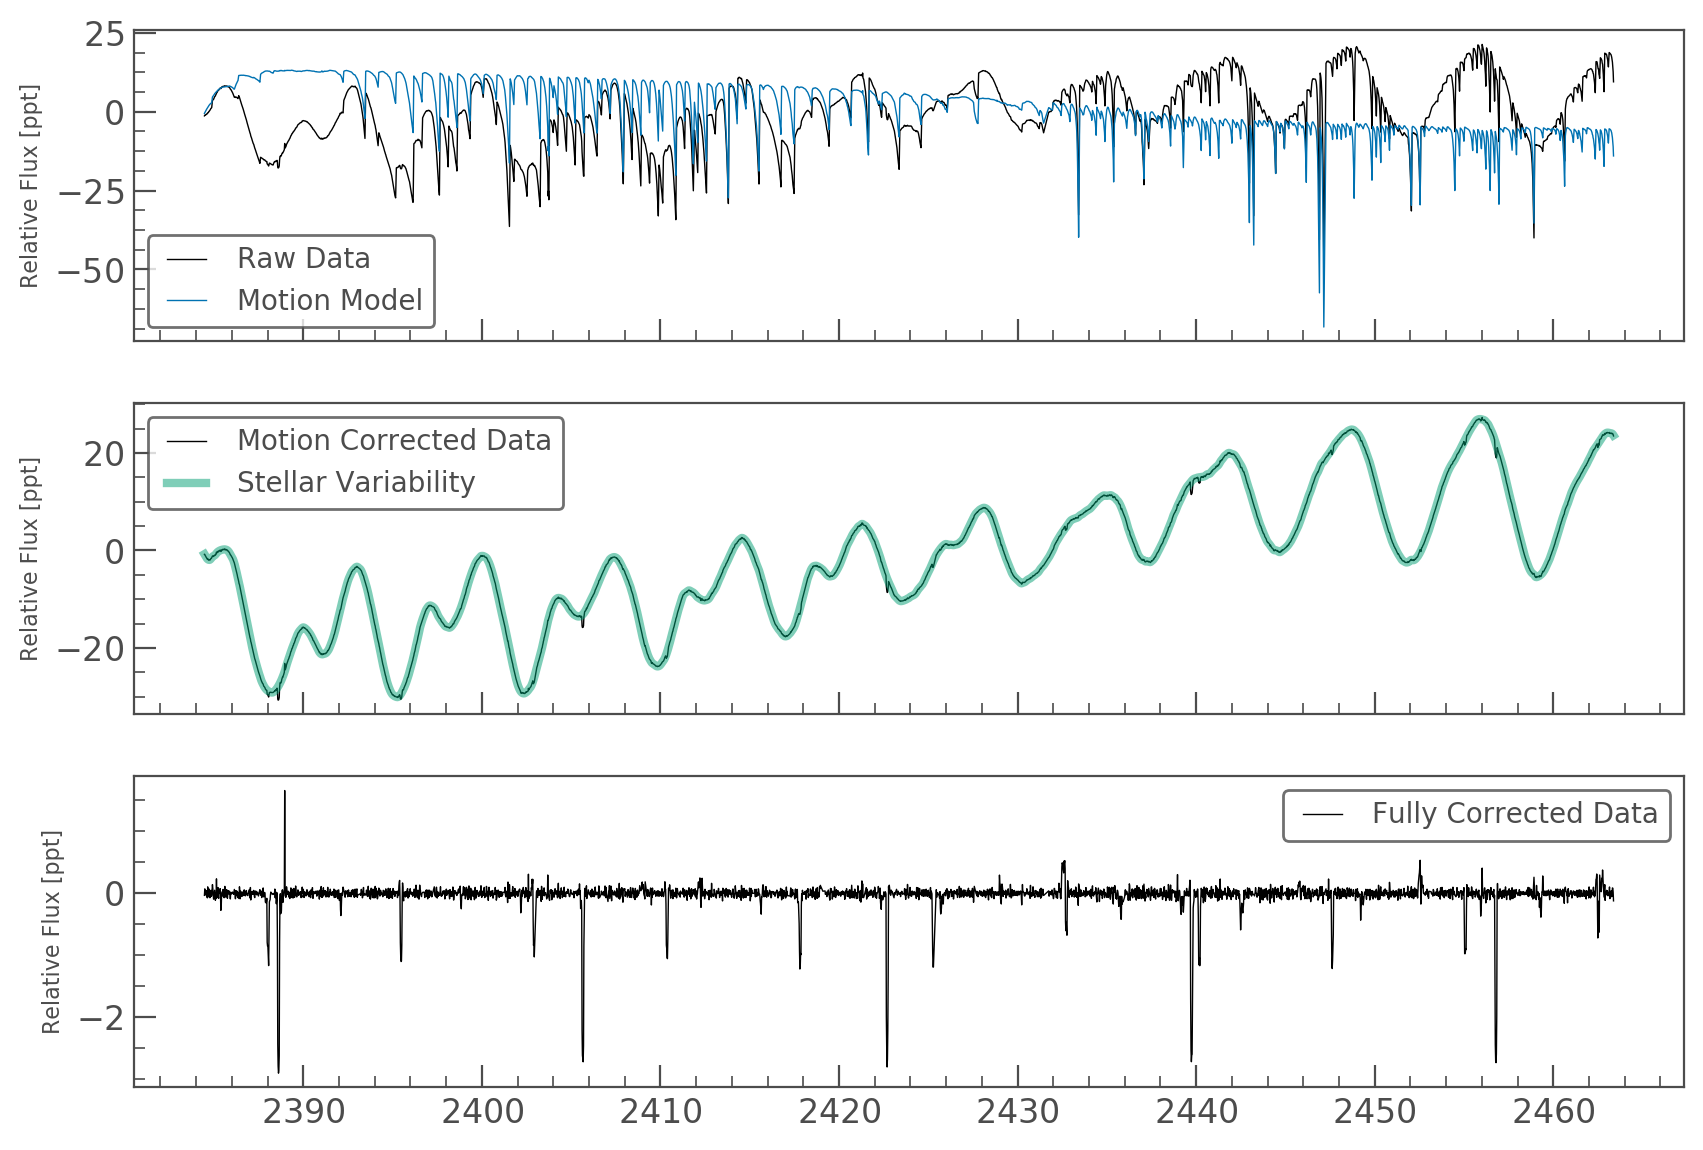

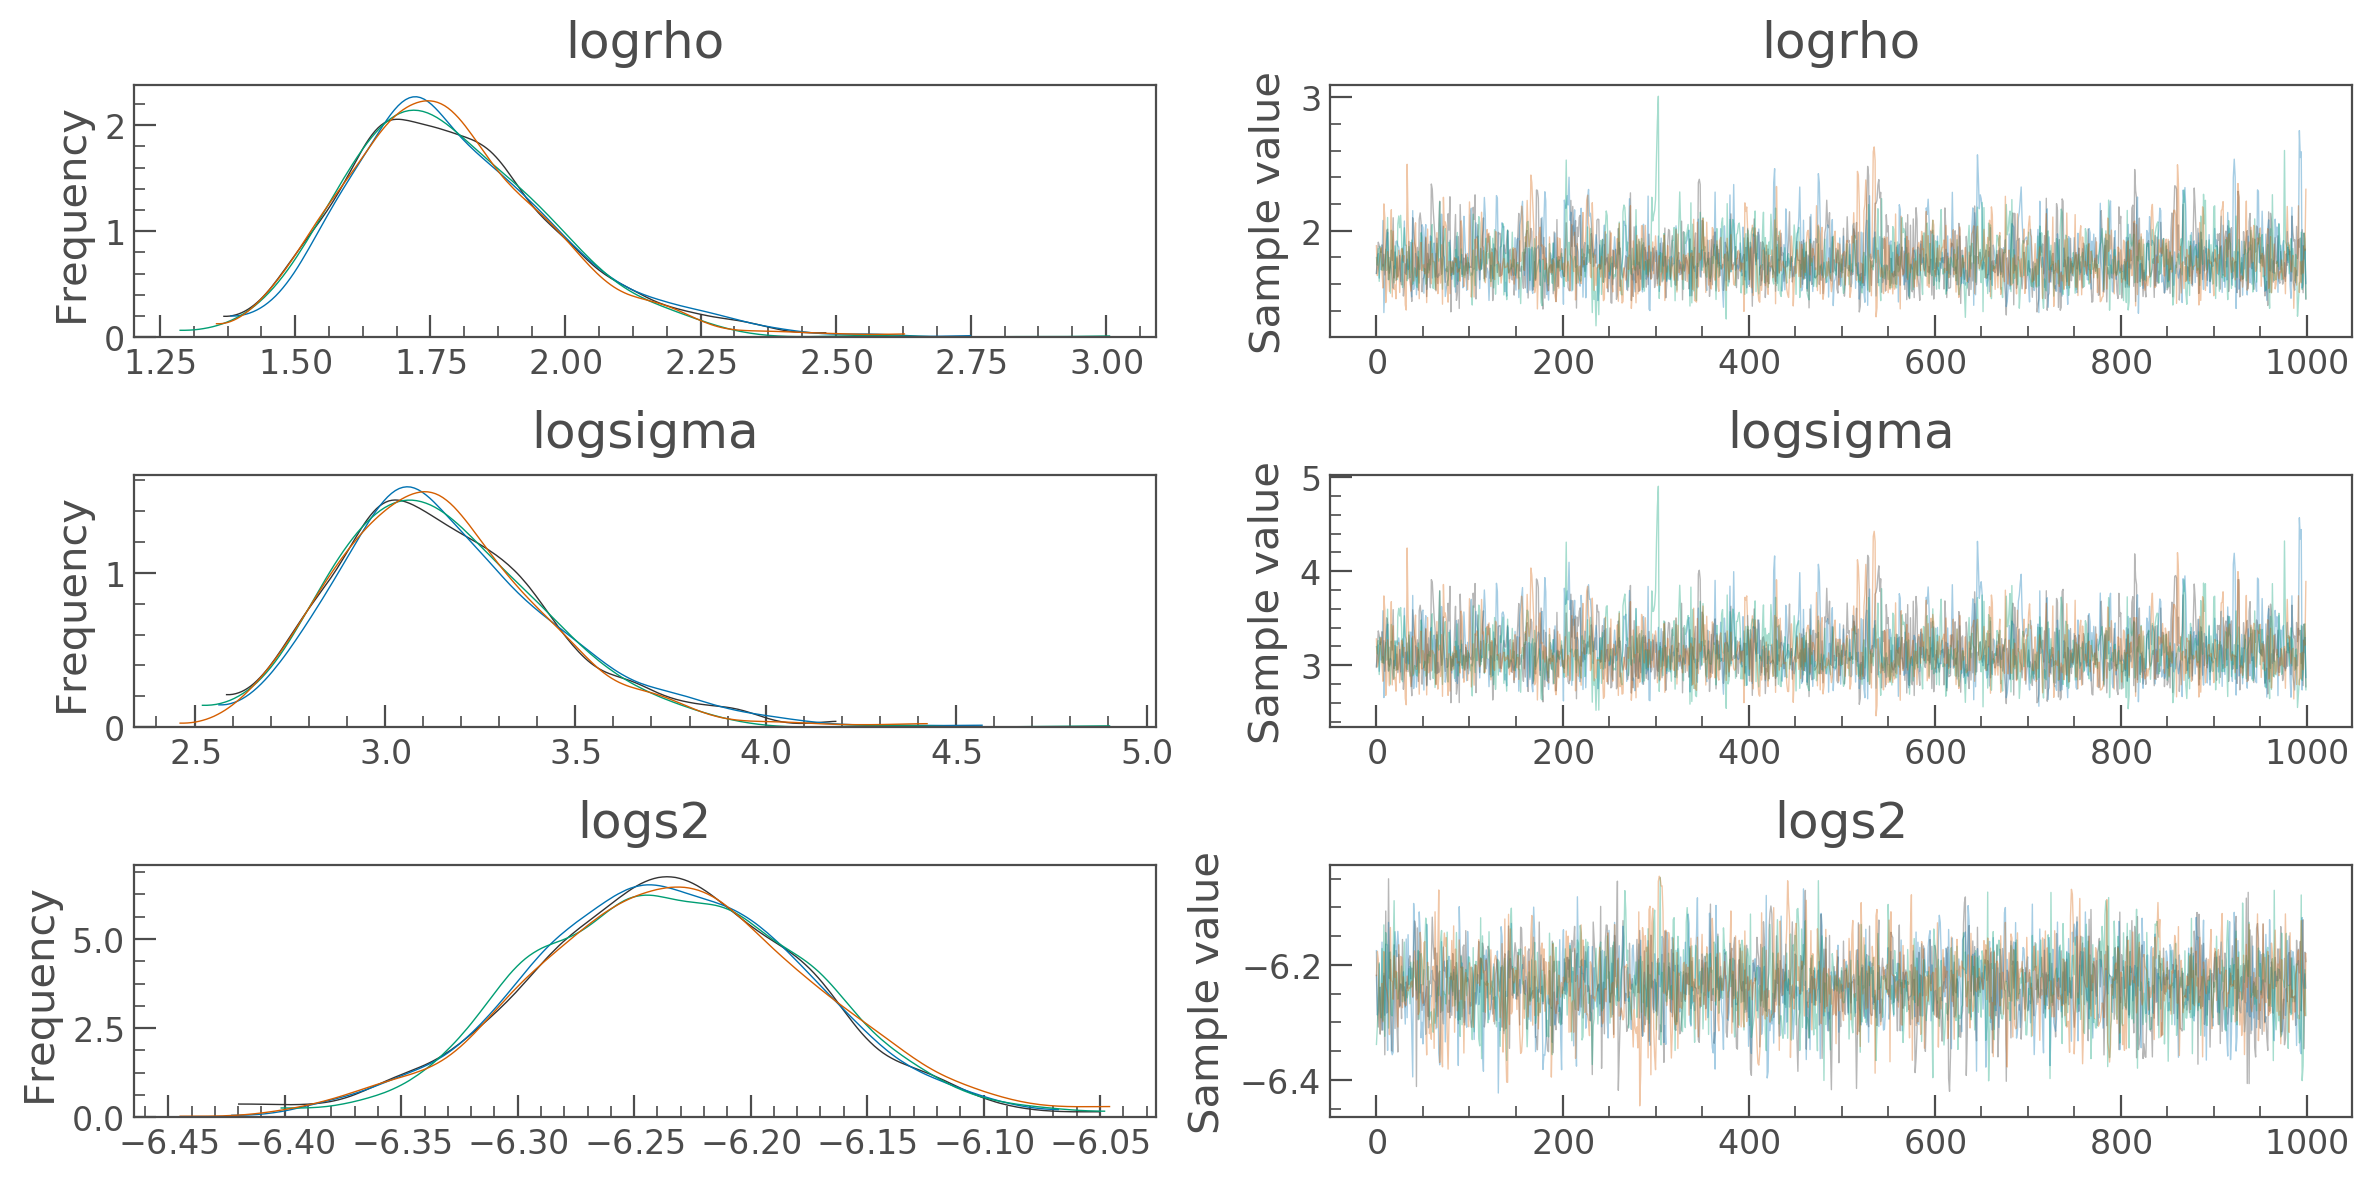

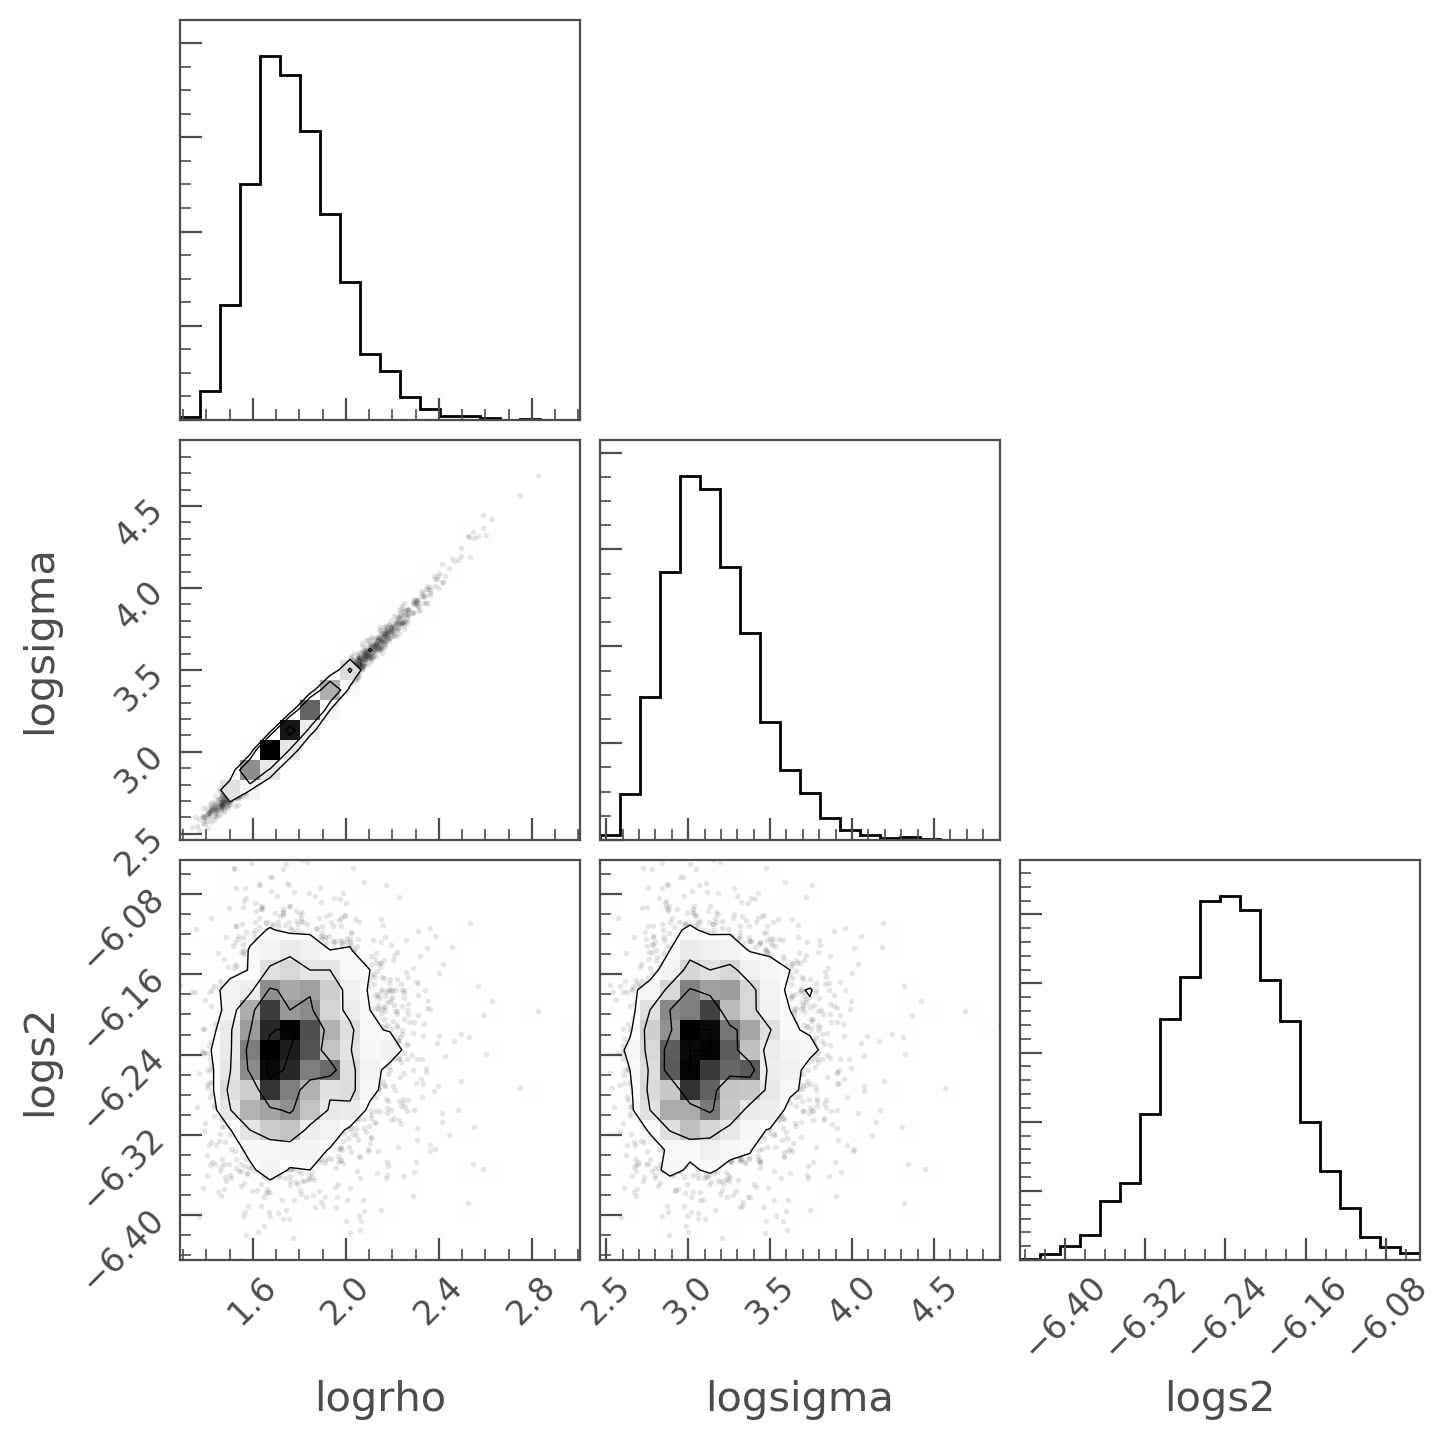

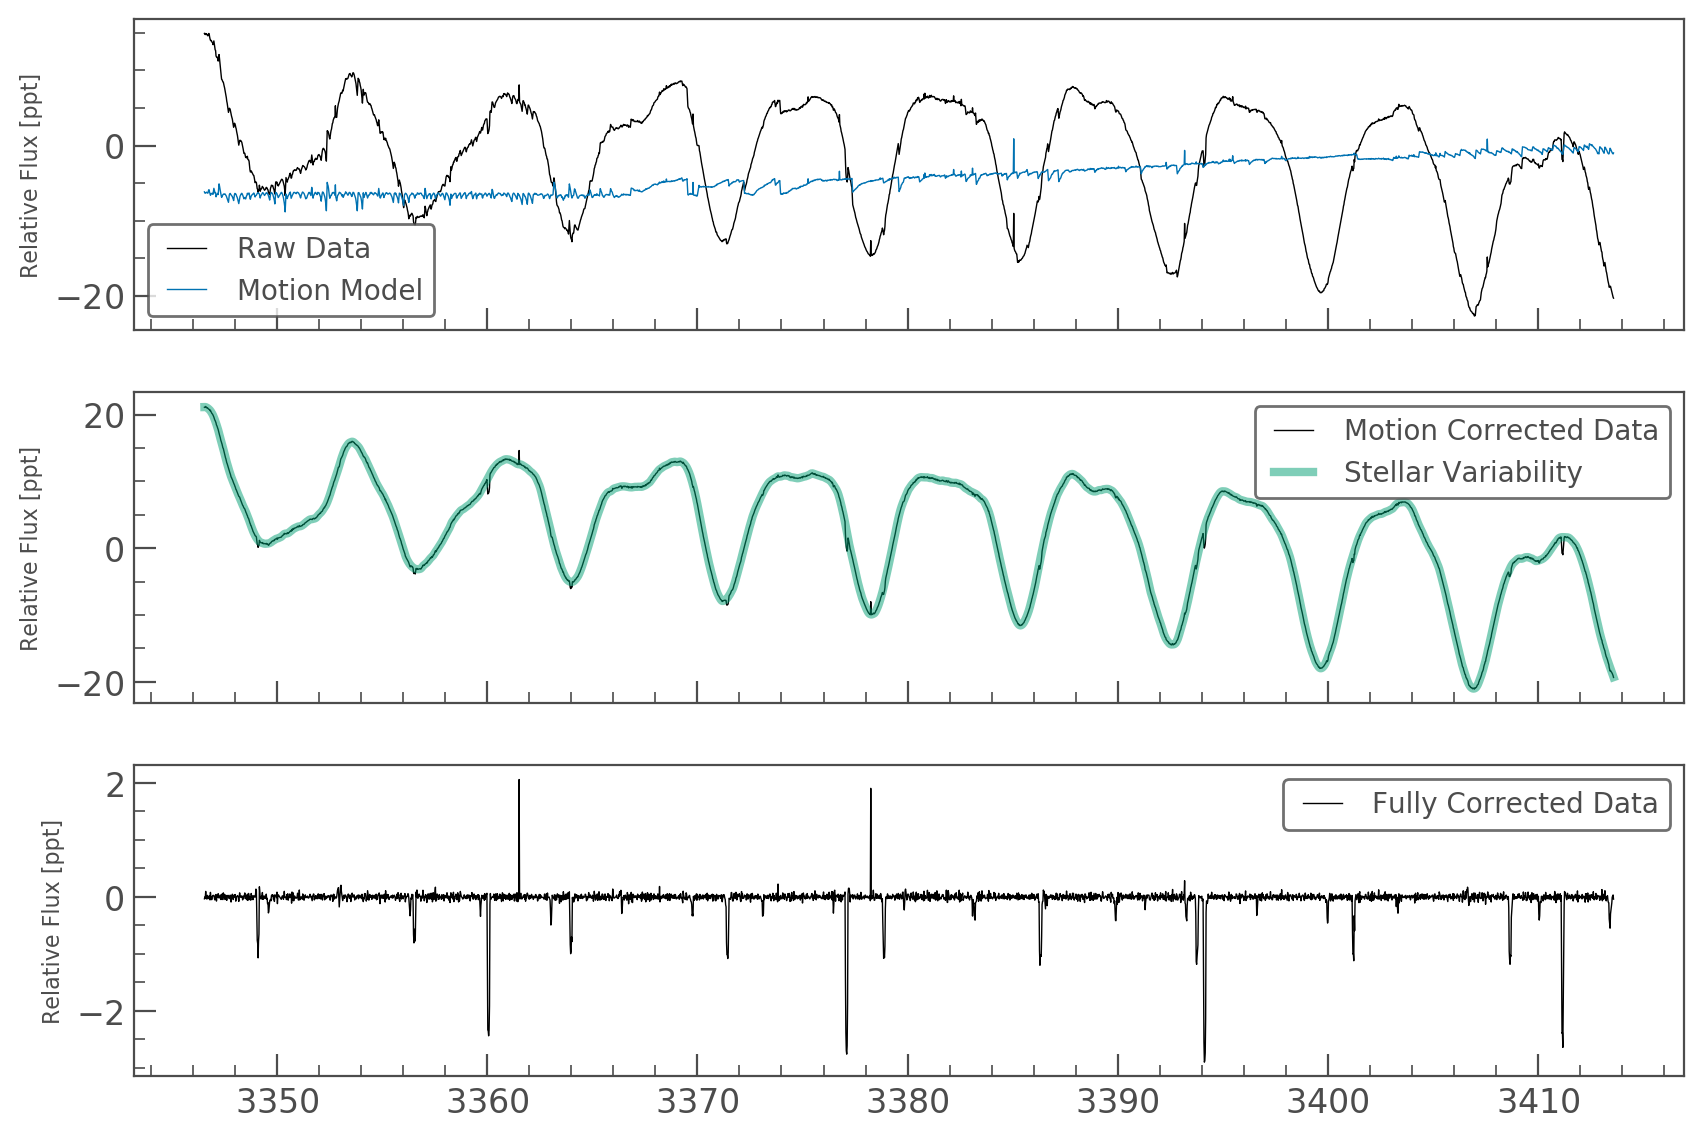

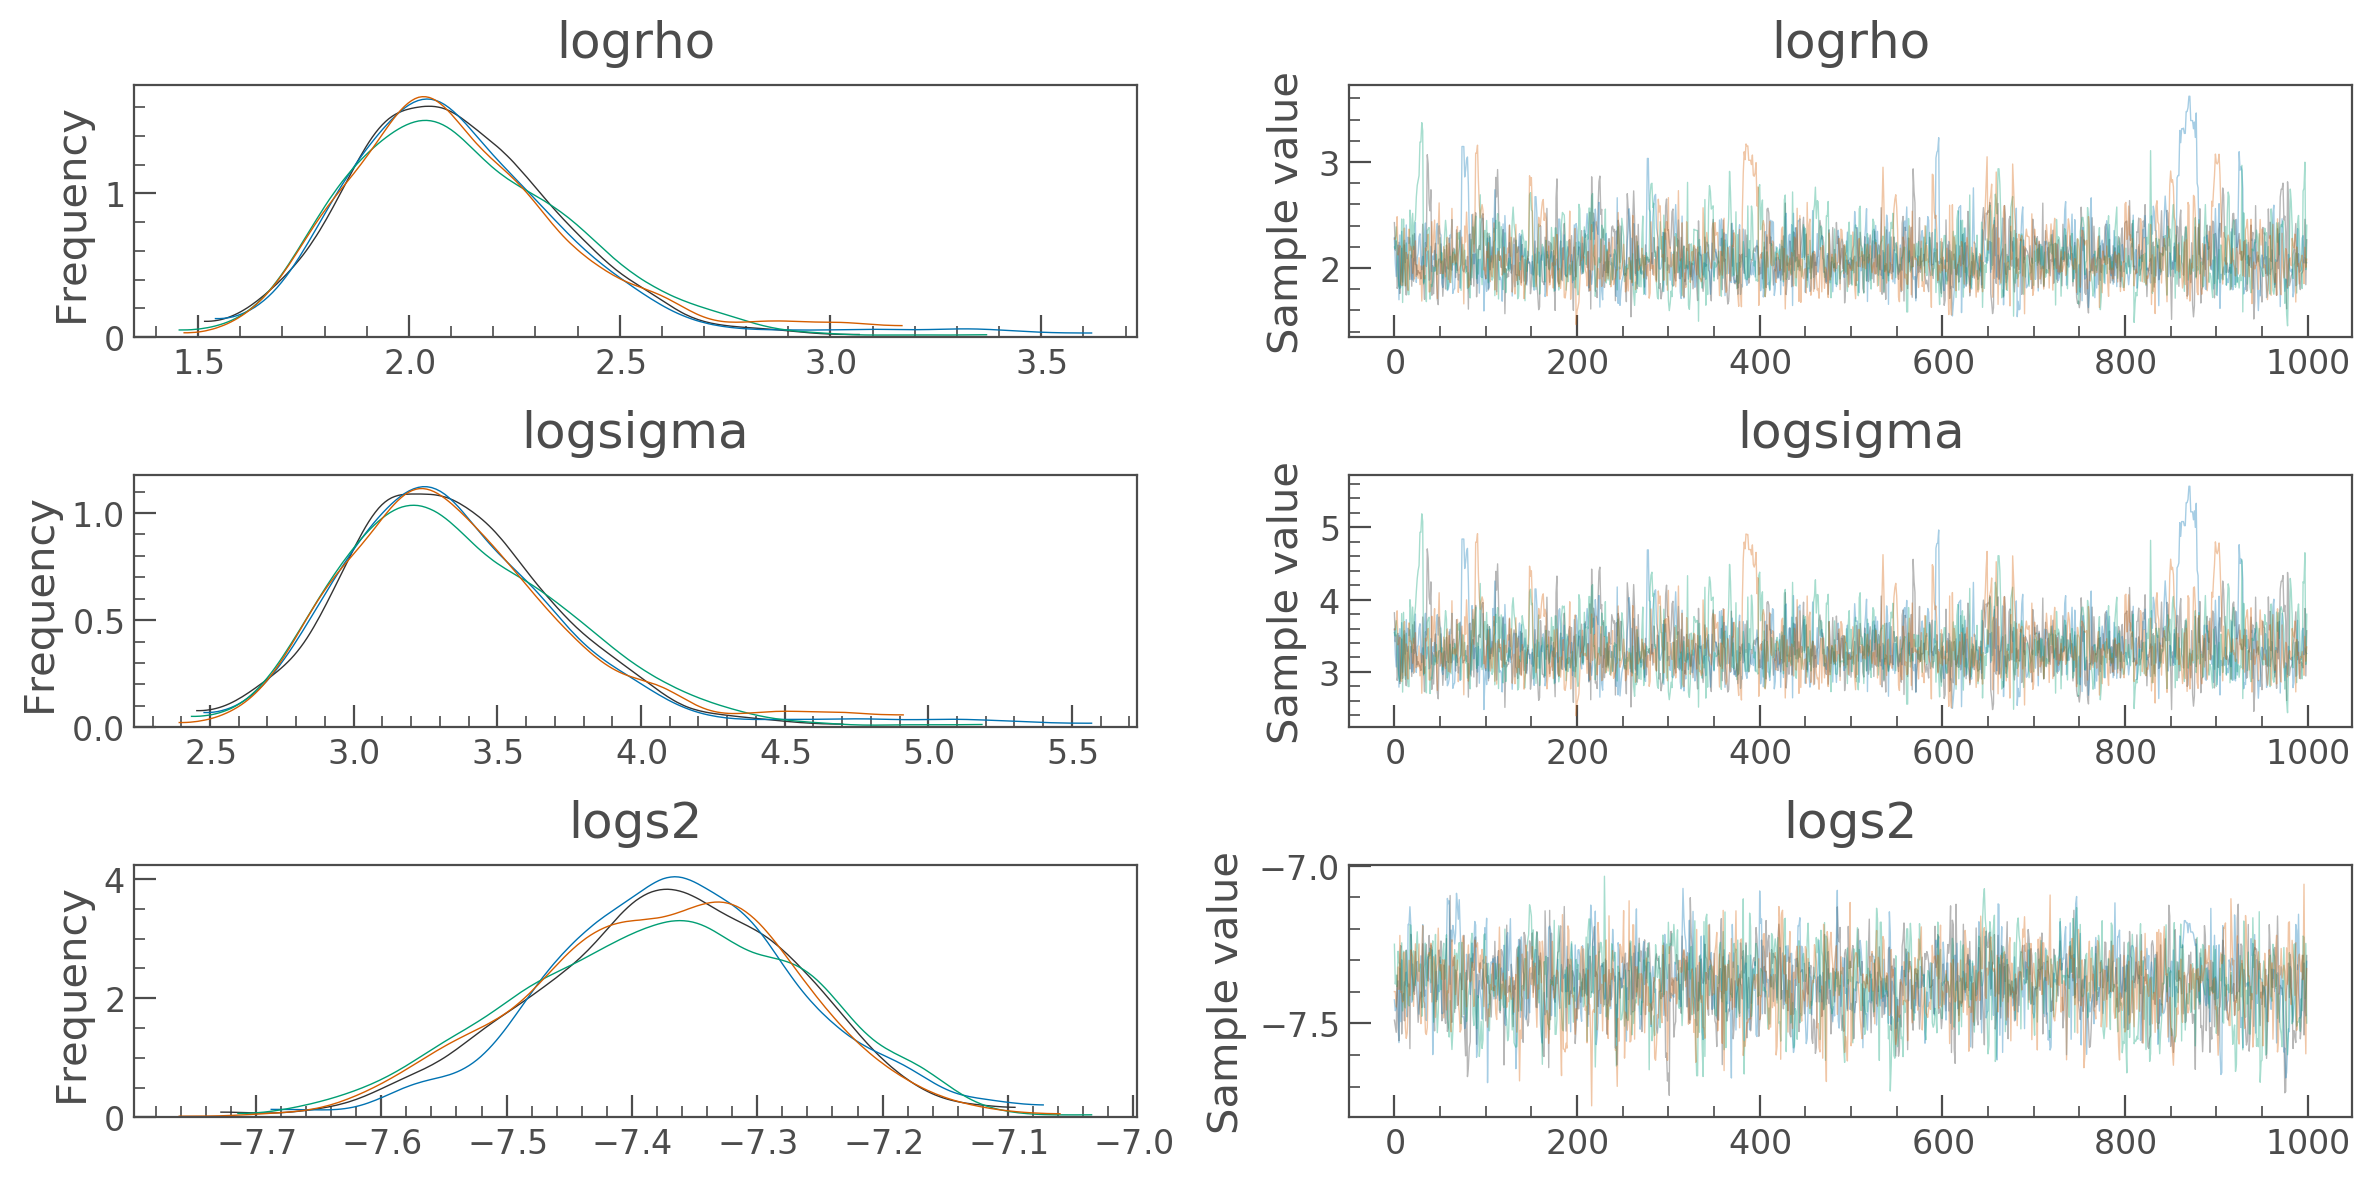

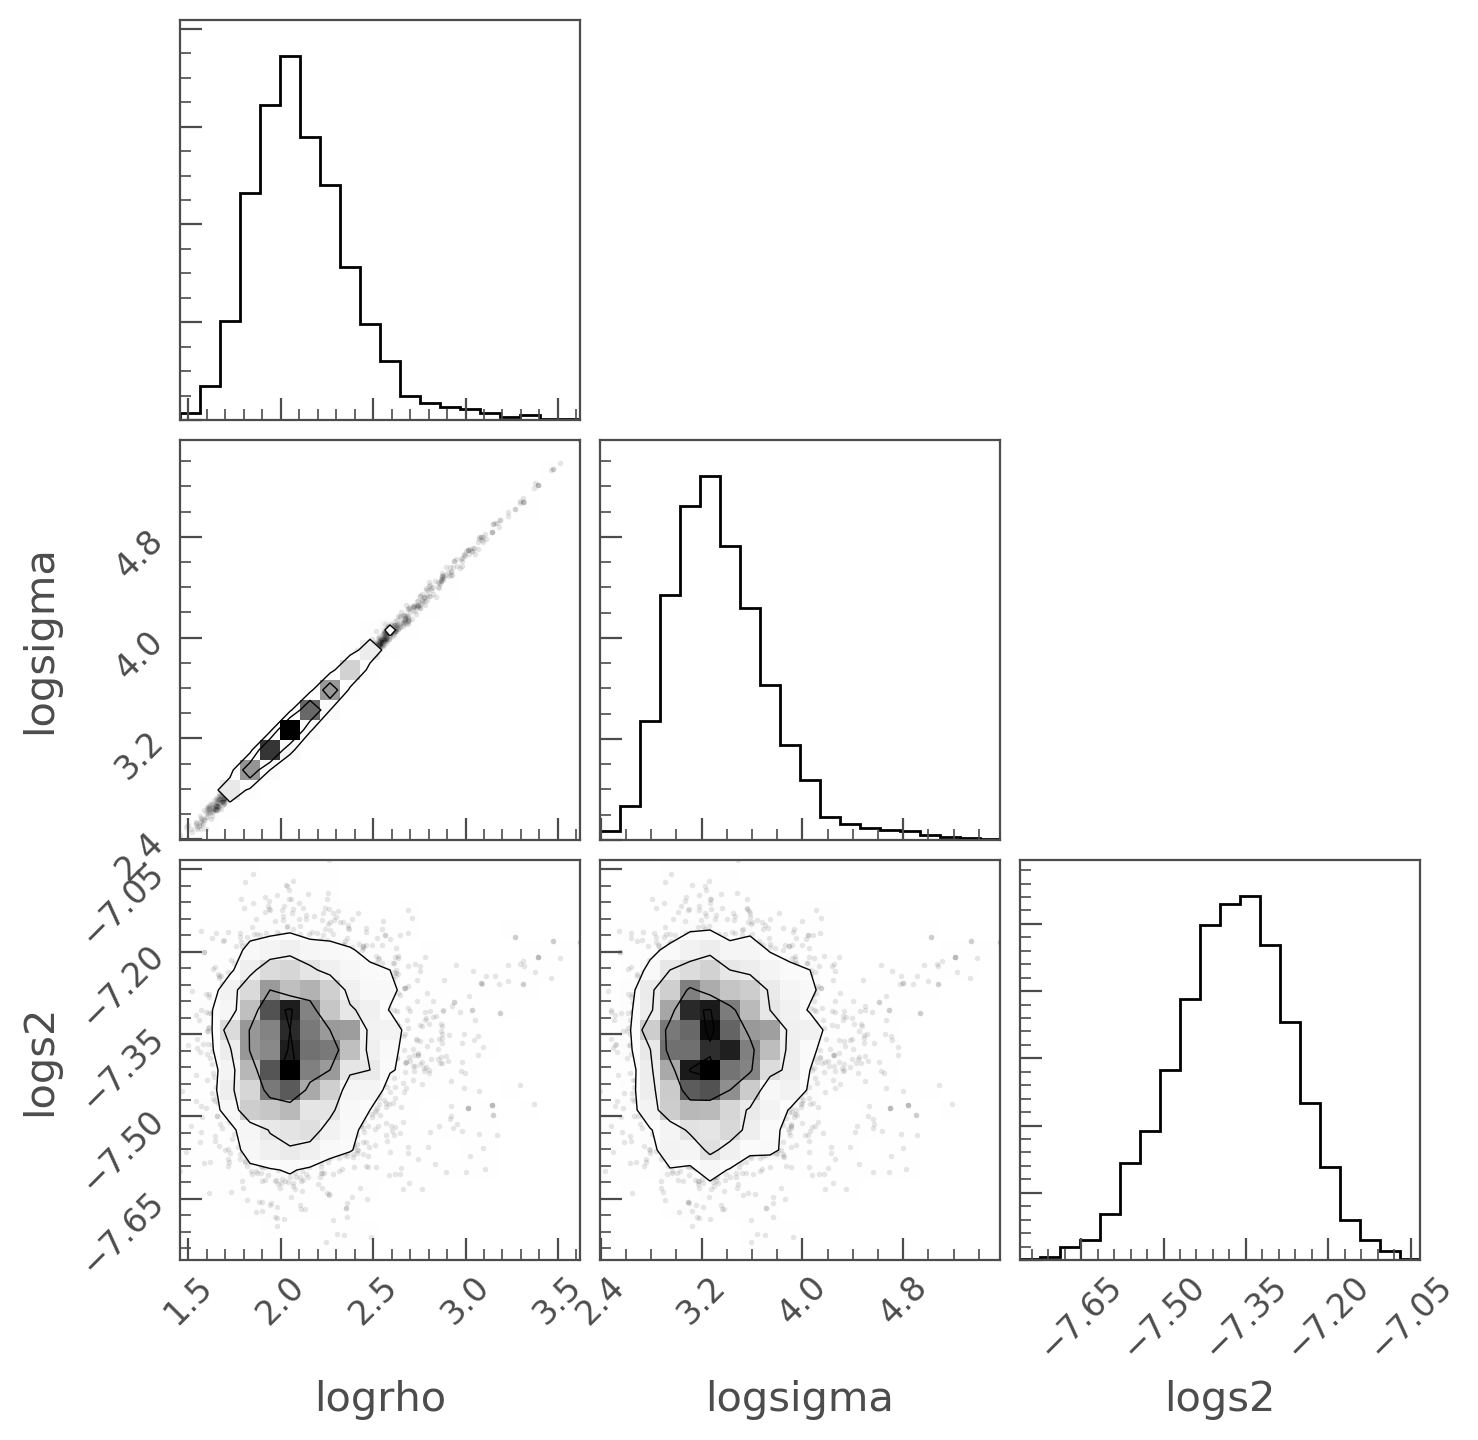

In [66]:
clcs = []     # Corrected Light Curves
for tpf in tpfs:
    tpf = tpf[tpf.to_lightcurve().normalize().flux > 0.8]
    mask = threemultis.utils.planet_mask(tpf.time, 'K2-198')
    clc = threemultis.fit.PLD(tpf, planet_mask=mask)
    clcs.append(clc)

In [67]:
clc = clcs[0].append(clcs[1])

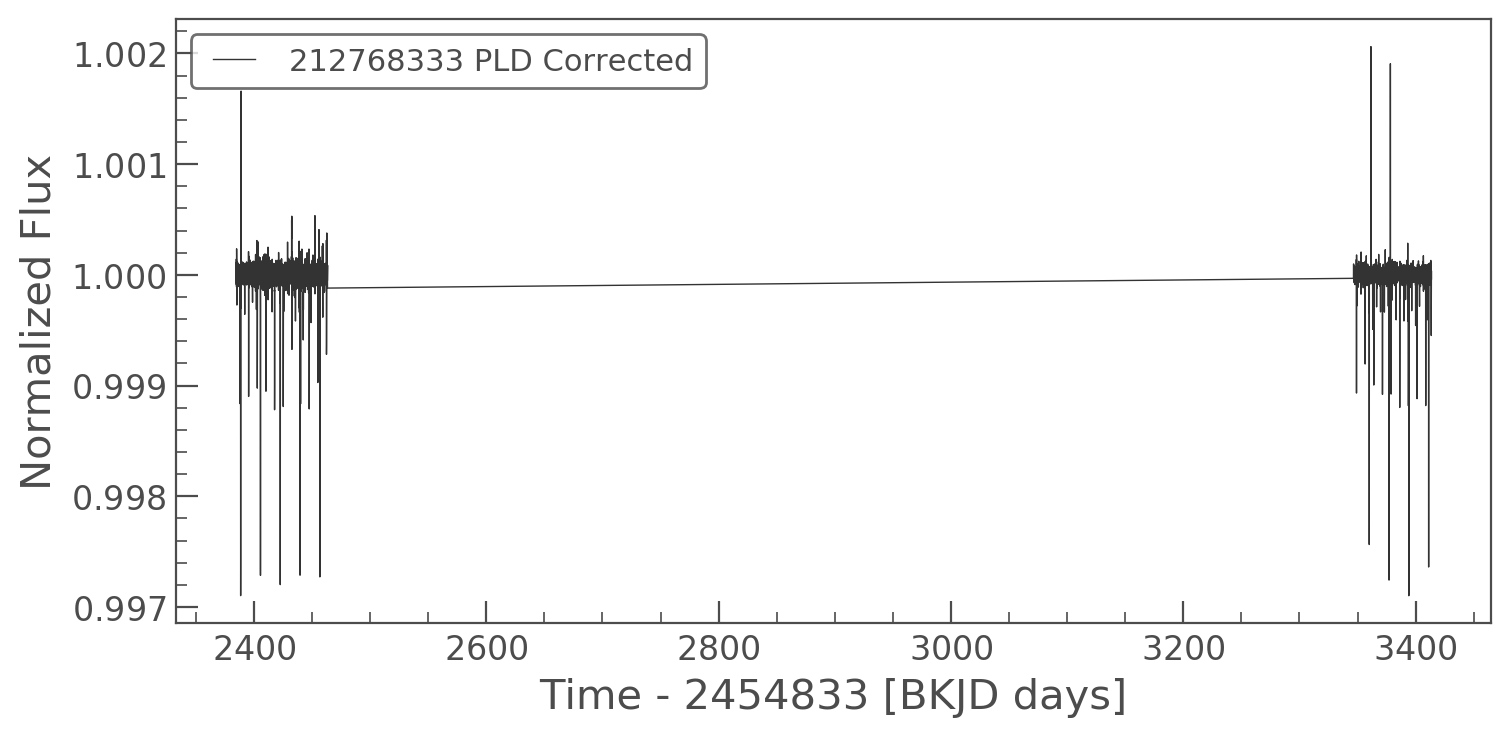

In [68]:
clc.plot();

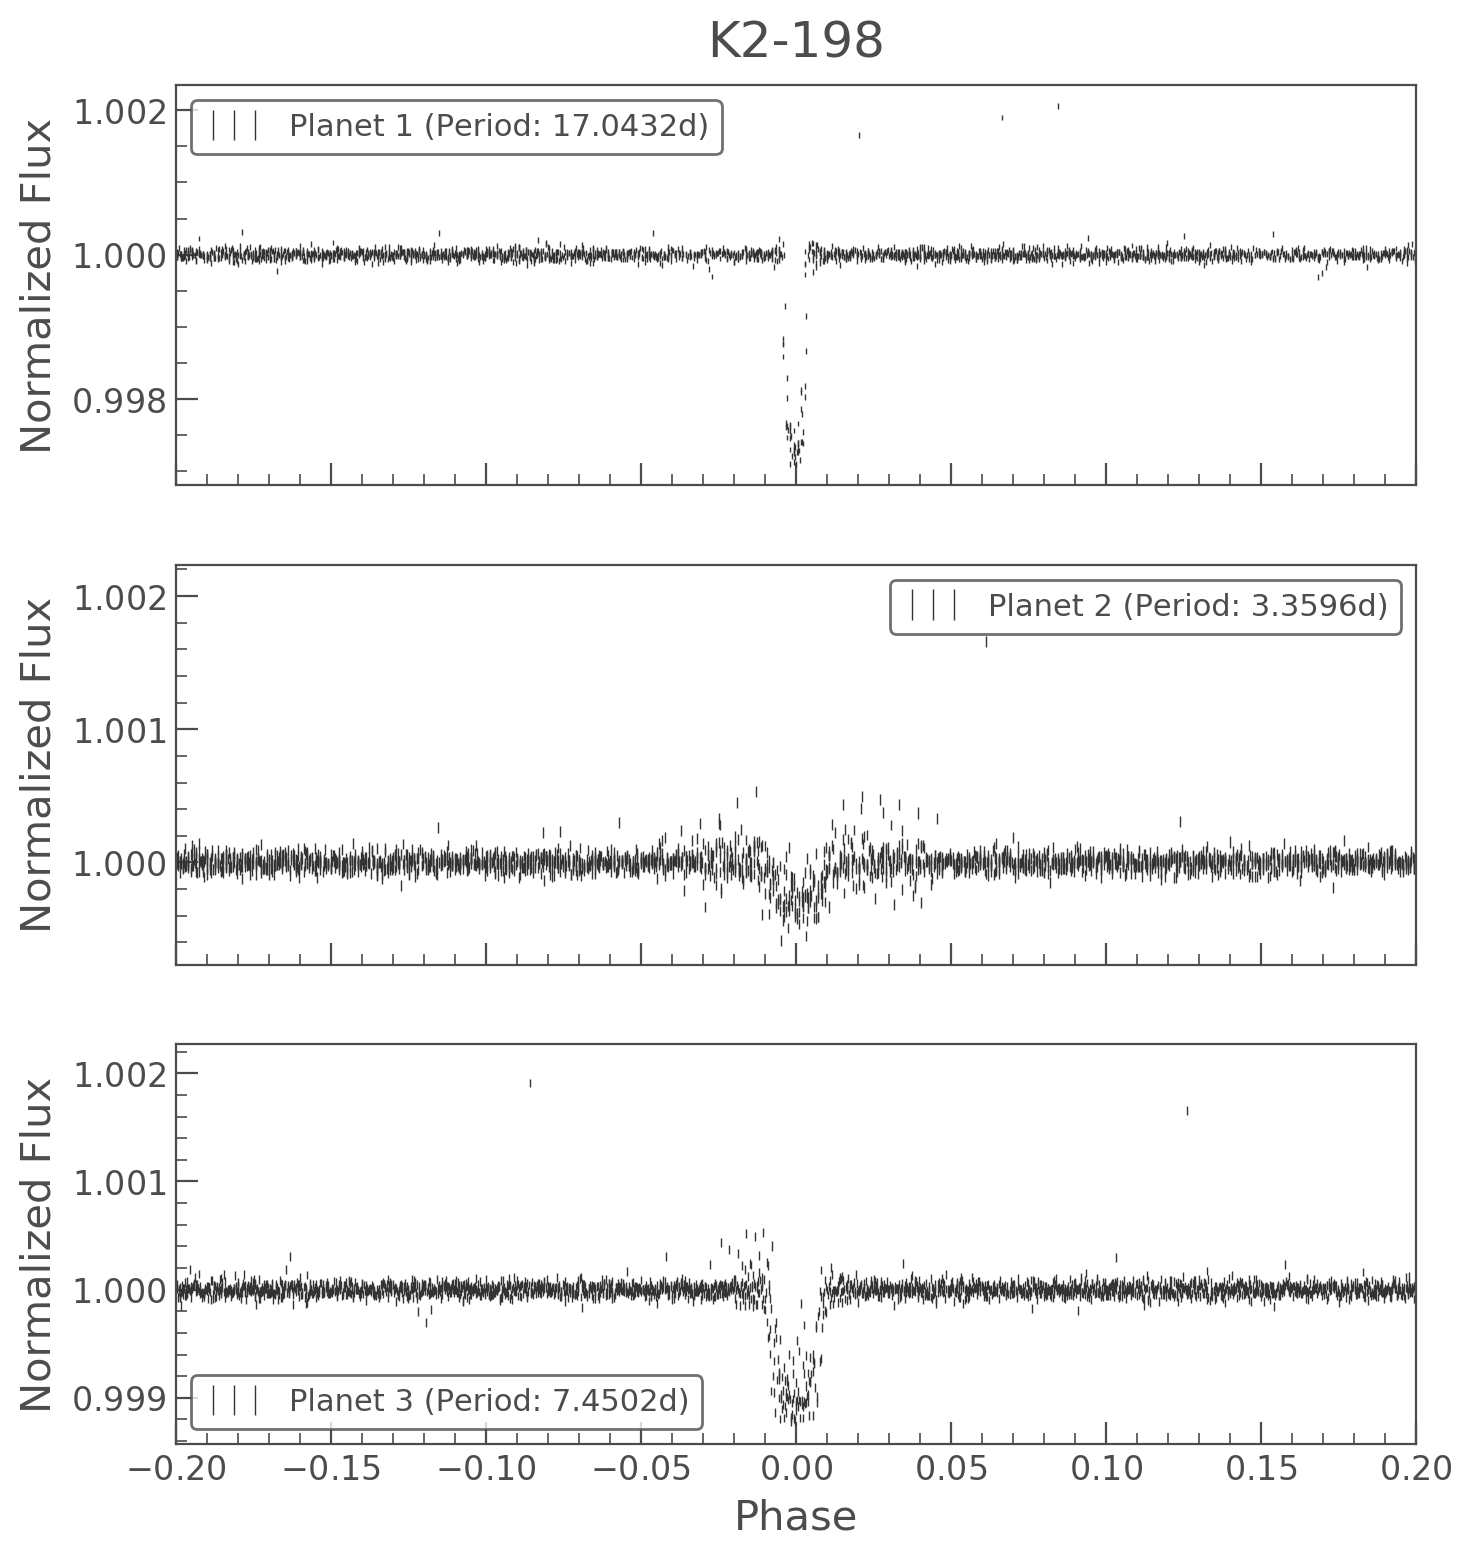

In [71]:
threemultis.utils.planet_plot(clc, 'K2-198');

In [69]:
params = threemultis.utils.get_params('K2-198')

In [70]:
params.loc[0, 'R_star']

0.77847

In [20]:
trace, mask = threemultis.fit.fit_planets(clc, period_value=list(params['Period']),
                                            t0_value=list(params['T0']), depth_value=list(params['Depth']),
                                            R_star=(params.loc[0, 'R_star'], params.loc[0, 'R_star_error']),
                                            M_star=(params.loc[0, 'M_star'], params.loc[0, 'M_star_error']),
                                            T_star=(params.loc[0, 'T_star'], params.loc[0, 'T_star_error']))

Sampling 4 chains: 100%|██████████| 208/208 [00:17<00:00, 11.92draws/s]
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [logr, b, t0, logP, t_star, r_star, m_star, u_star, mean]
Sampling 4 chains: 100%|██████████| 1600/1600 [04:13<00:00,  2.18draws/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


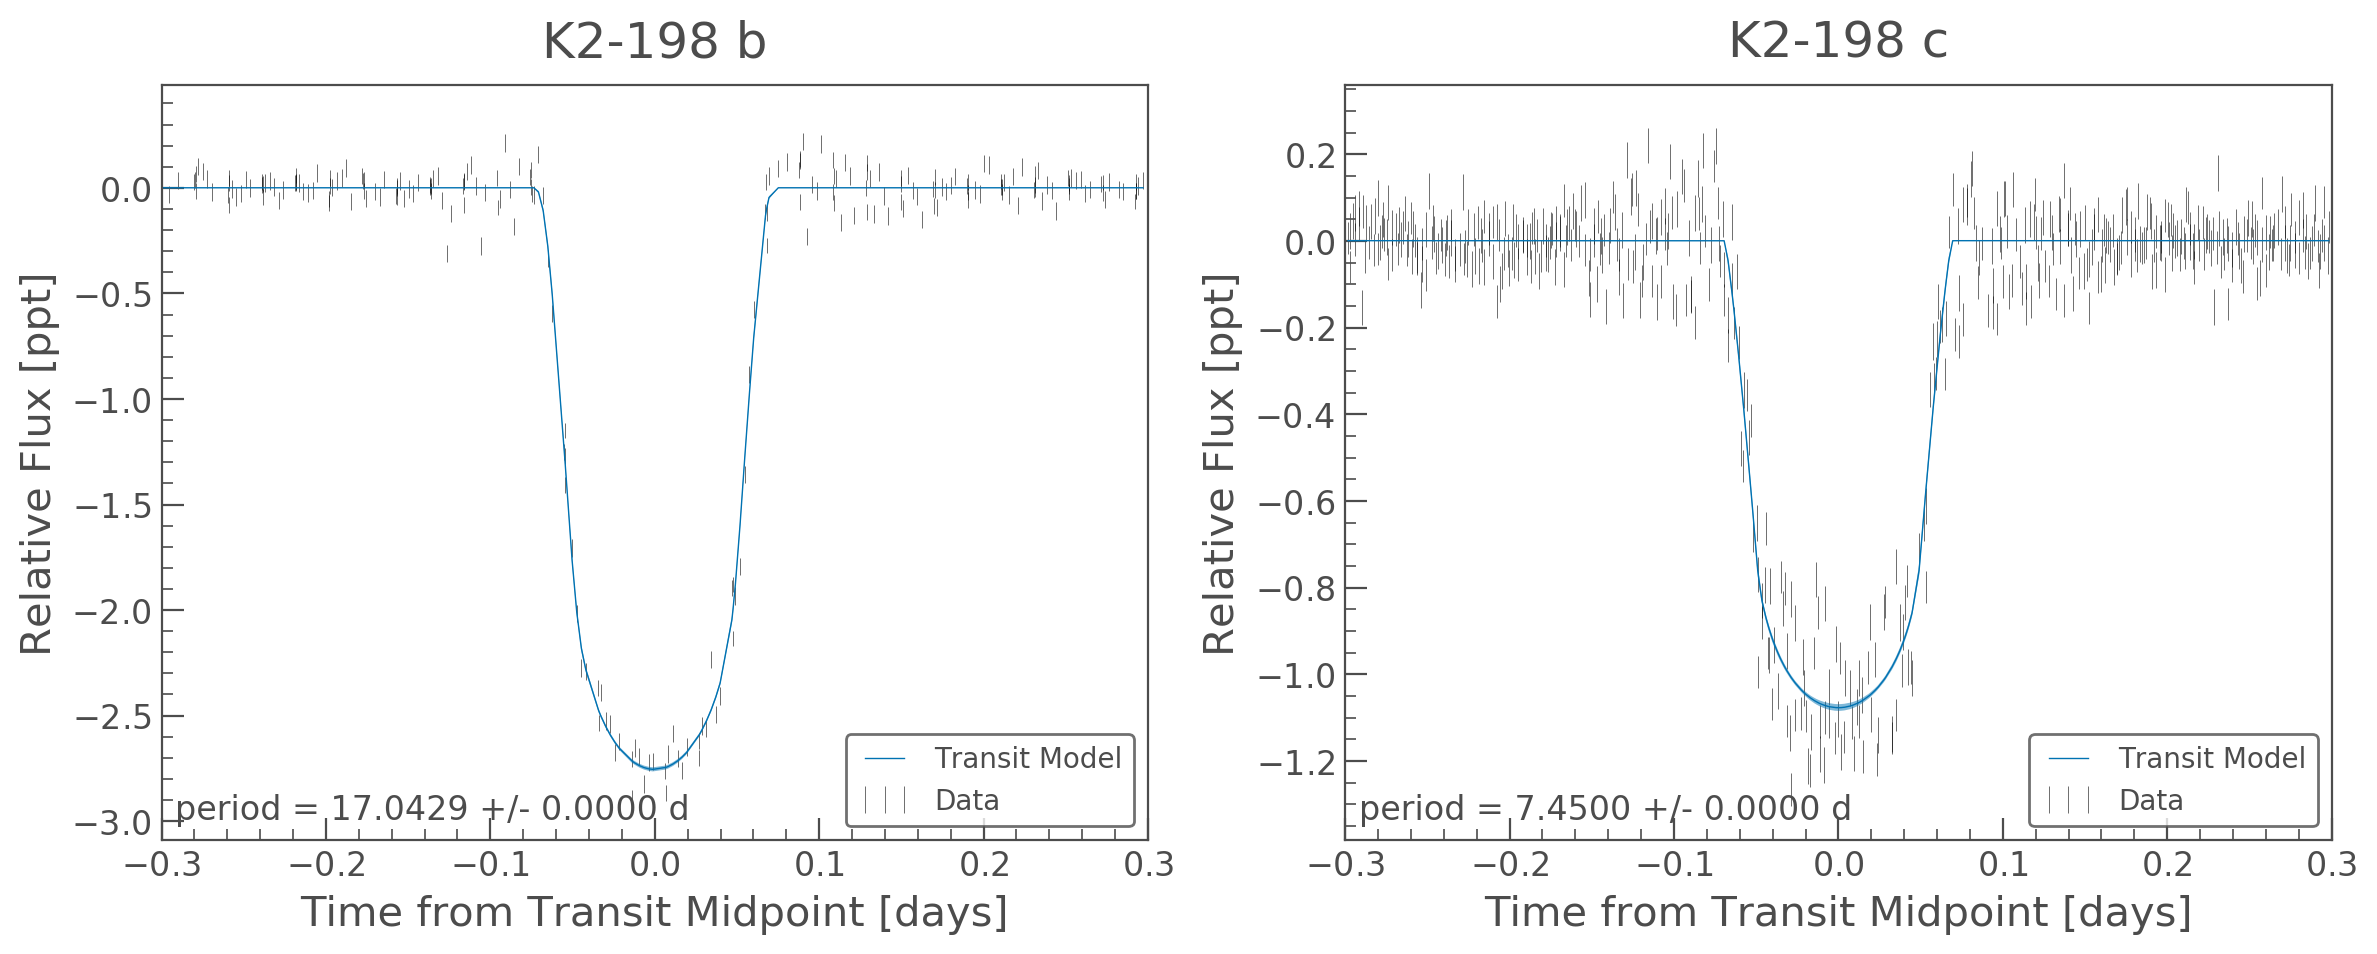

In [28]:
threemultis.fit.plot_folded_transits(clc, trace, mask, 'K2-198');

In [24]:
print(threemultis.fit.latex_trace(trace, 'K2-198'))

\begin{tabular}{lll}
\toprule
{} &                             \emph{K2-198 b} &                            \emph{K2-198 c} \\
\midrule
Period [days]             &  17.0428672 $\pm _{0.0000035} ^{0.0000072}$ &  7.4500201 $\pm _{0.0000026} ^{0.0000053}$ \\
Transit Midpoint [JD]     &   2457221.61151 $\pm _{0.00015} ^{0.00028}$ &     2454837.0179 $\pm _{0.0011} ^{0.0021}$ \\
Radius [$R_{earth}$]      &               4.147 $\pm _{0.096} ^{0.225}$ &              2.424 $\pm _{0.056} ^{0.134}$ \\
Impact Parameter          &               0.657 $\pm _{0.011} ^{0.034}$ &              0.051 $\pm _{0.113} ^{0.225}$ \\
Inclination [degrees]     &            88.922 $\pm _{-0.031} ^{-0.098}$ &              89.86 $\pm _{-0.33} ^{-0.67}$ \\
Semi Major Axis [a/R$^*]$ &                 25.91 $\pm _{0.46} ^{0.93}$ &                14.92 $\pm _{0.26} ^{0.54}$ \\
Effective Temperature [K] &               717.76 $\pm _{6.84} ^{13.36}$ &              945.75 $\pm _{9.01} ^{17.61}$ \\
\bottomrule
\end{tabular

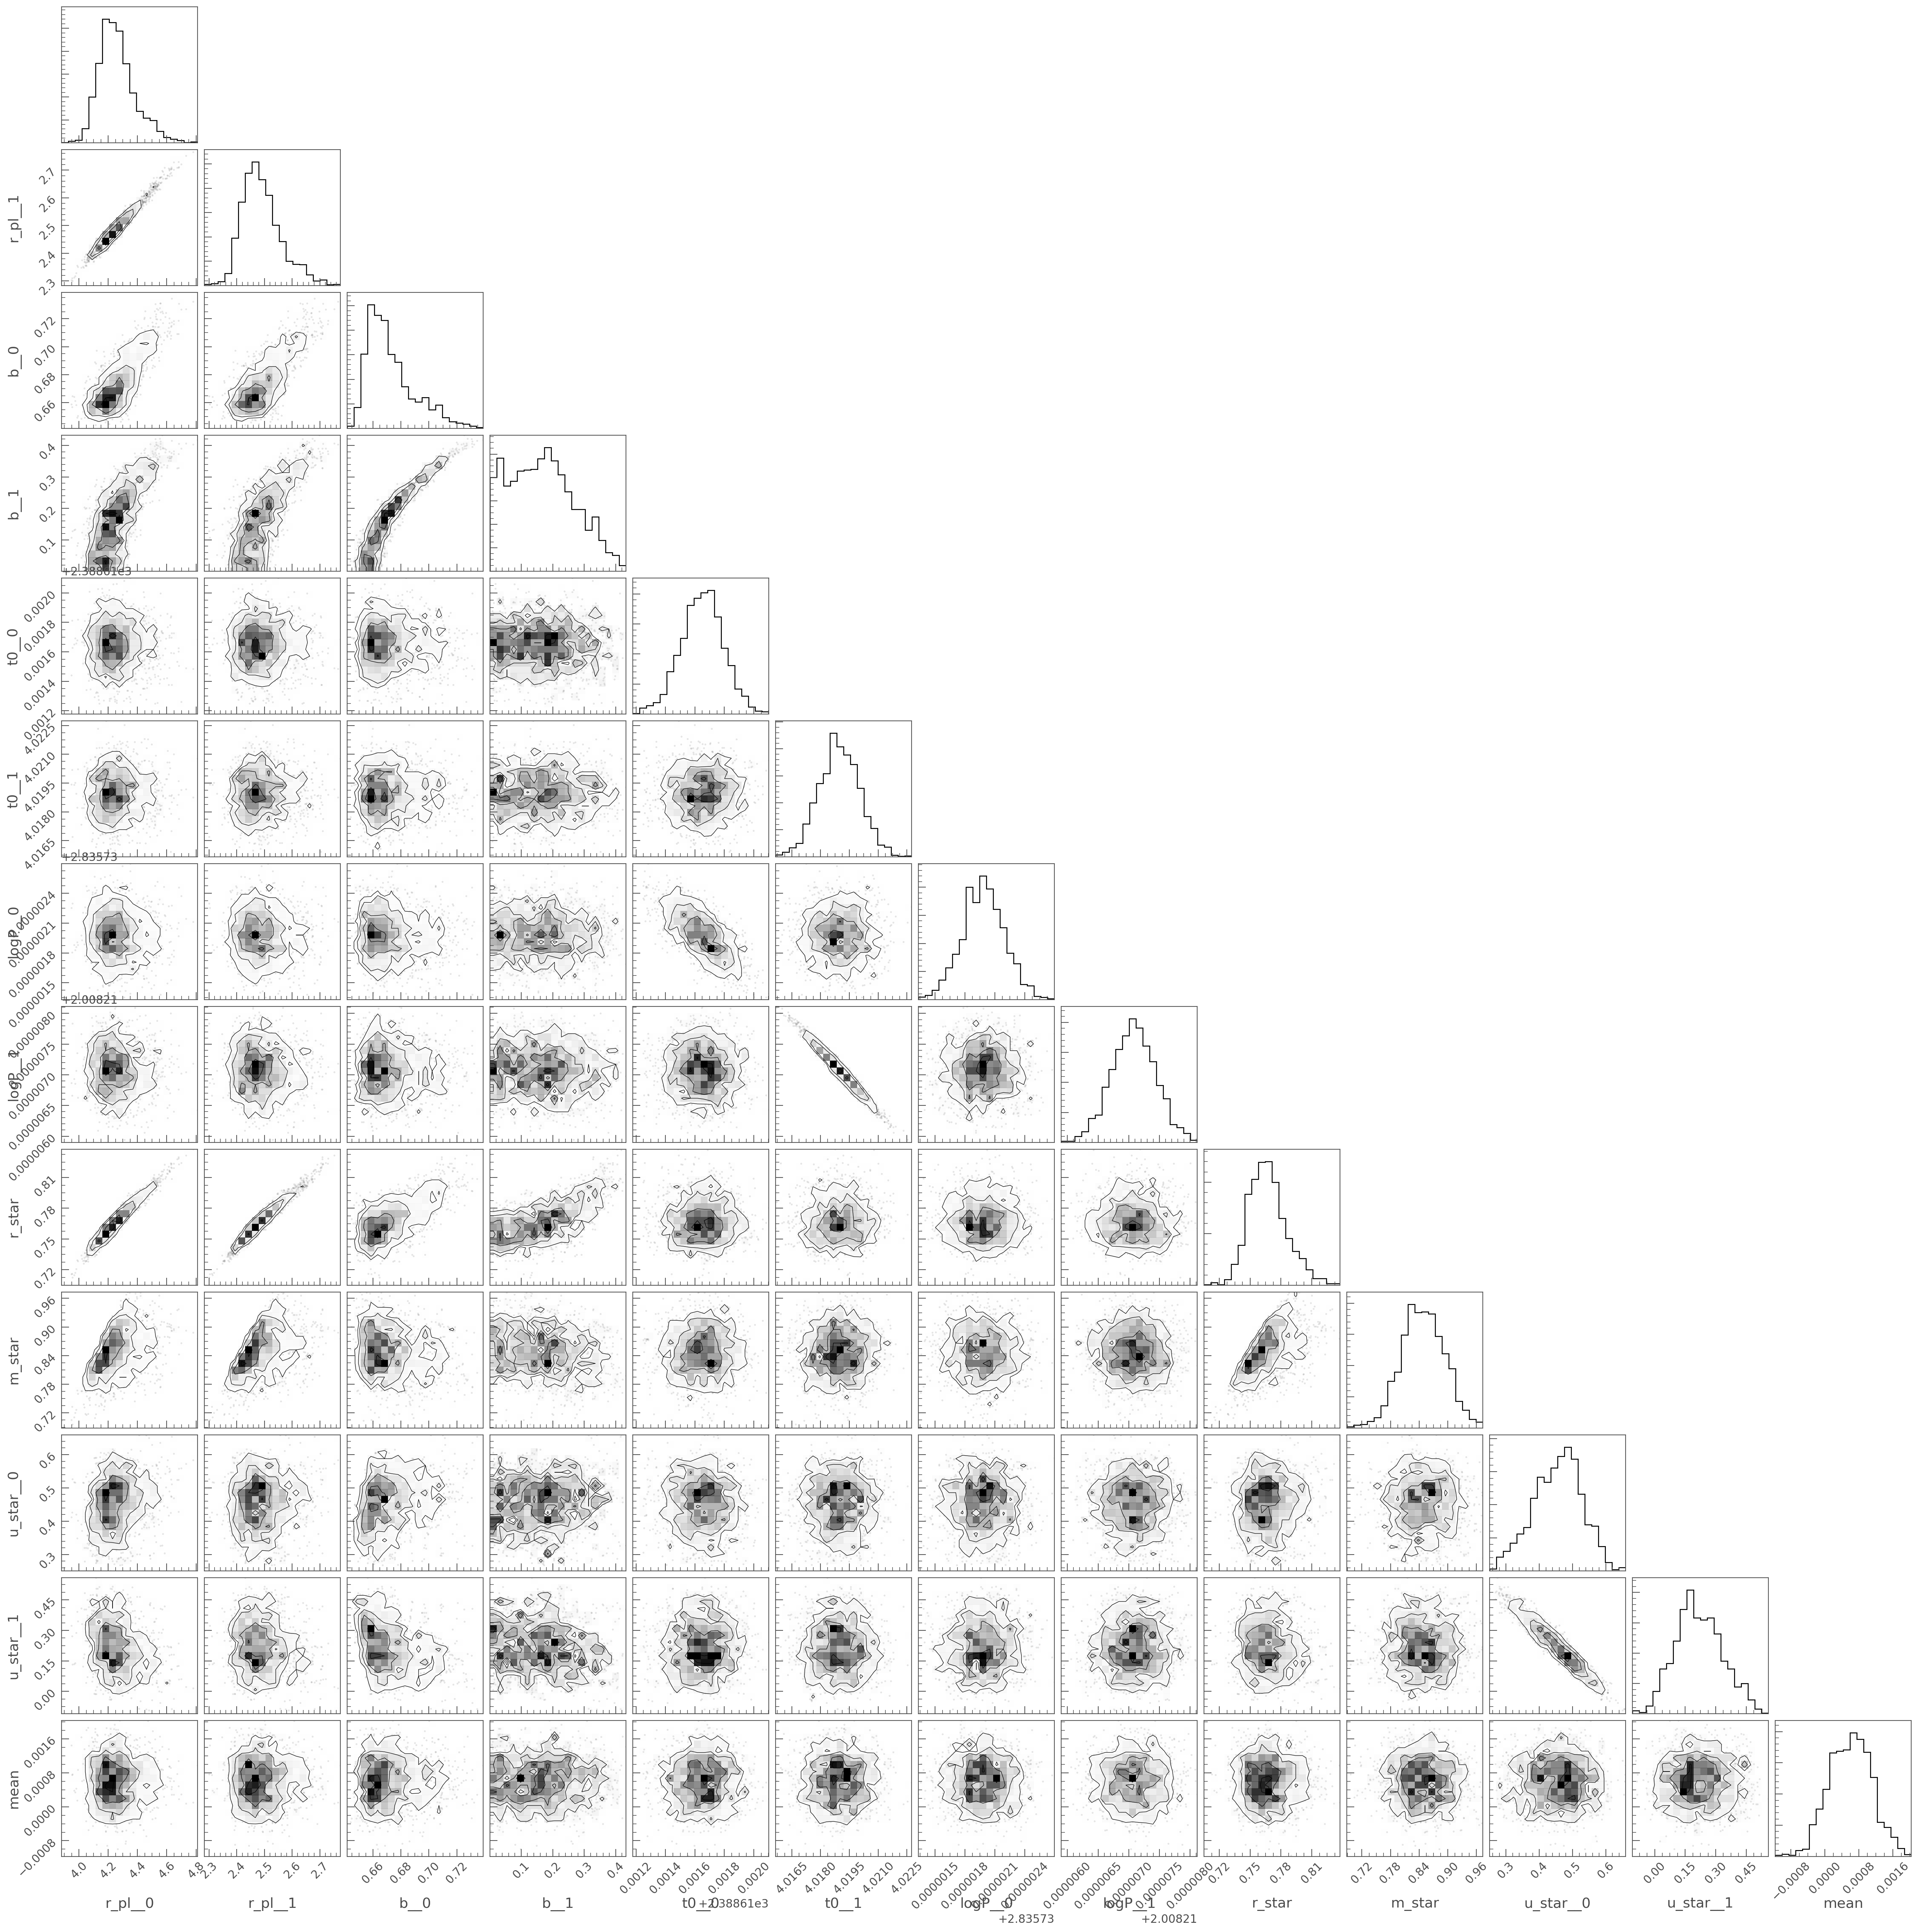

In [27]:
import pymc3 as pm
import corner
import astropy.units as u
varnames = varnames=["r_pl", "b", "t0", "logP", "r_star", "m_star", "u_star", "mean"]
samples = pm.trace_to_dataframe(trace, varnames=varnames)

# Convert the radius to Earth radii
samples["r_pl__0"] = (np.array(samples["r_pl__0"]) * u.R_sun).to(u.R_earth).value
samples["r_pl__1"] = (np.array(samples["r_pl__1"]) * u.R_sun).to(u.R_earth).value


corner.corner(samples);

In [72]:
mask2 = threemultis.utils.planet_mask(clc.time, 'K2-198')

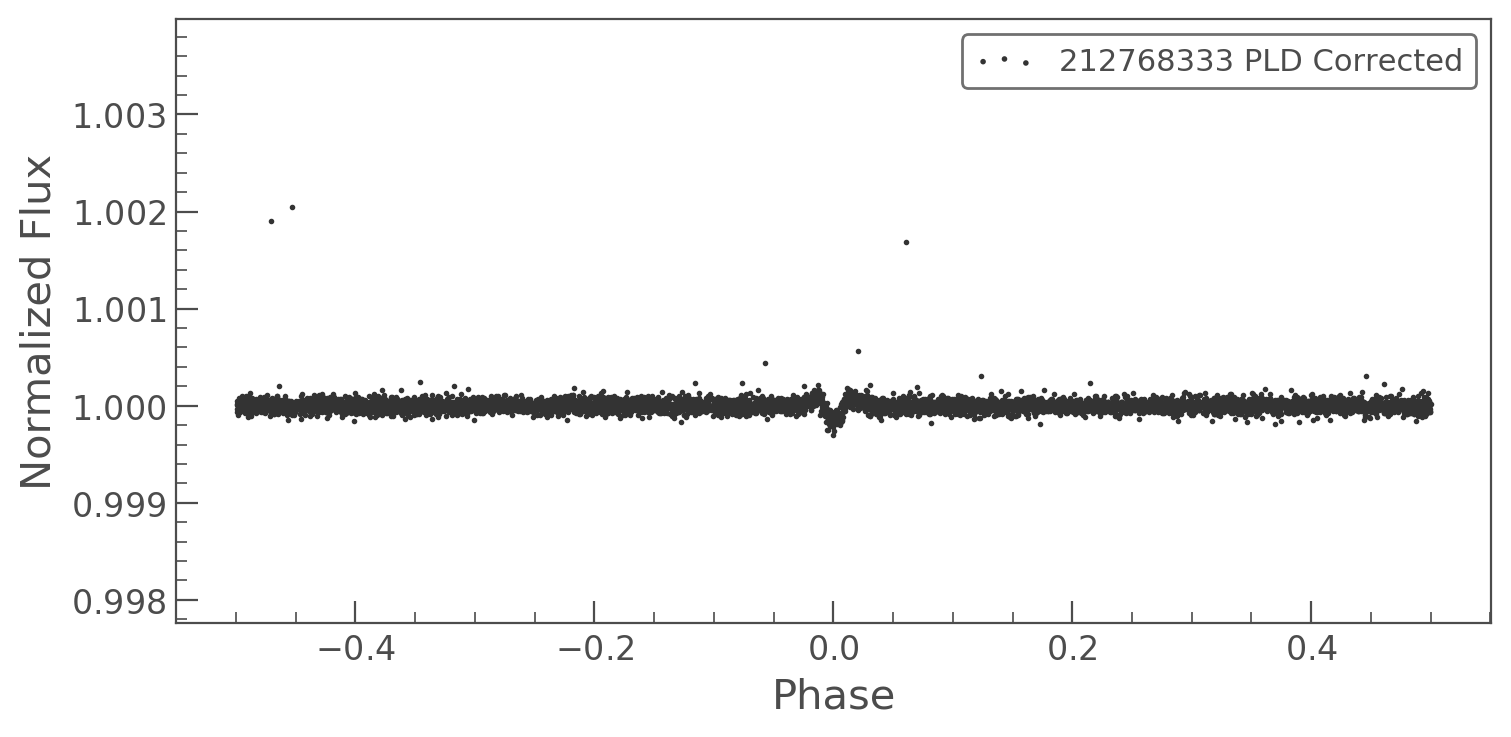

In [35]:
clc[mask2].fold(3.3595901, 0.0838572).scatter()

{0, 2}